----- k_path report begin ----------
real-space lattice vectors
 [[-0.5  0.5  0.5]
 [ 0.5 -0.5  0.5]
 [ 0.5  0.5 -0.5]]
k-space metric tensor
 [[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]
internal coordinates of nodes
 [[ 0.5  -0.5   0.5 ]
 [ 0.    0.    0.  ]
 [ 0.5  -0.5   0.5 ]
 [ 0.25  0.25  0.25]
 [ 0.    0.    0.5 ]
 [ 0.    0.    0.  ]]
reciprocal-space lattice vectors
 [[-0.  1.  1.]
 [ 1.  0.  1.]
 [ 1.  1.  0.]]
cartesian coordinates of nodes
 [[0.  1.  0. ]
 [0.  0.  0. ]
 [0.  1.  0. ]
 [0.5 0.5 0.5]
 [0.5 0.5 0. ]
 [0.  0.  0. ]]
list of segments:
  length =     1.0  from  [ 0.5 -0.5  0.5]  to  [0. 0. 0.]
  length =     1.0  from  [0. 0. 0.]  to  [ 0.5 -0.5  0.5]
  length = 0.86603  from  [ 0.5 -0.5  0.5]  to  [0.25 0.25 0.25]
  length =     0.5  from  [0.25 0.25 0.25]  to  [0.  0.  0.5]
  length = 0.70711  from  [0.  0.  0.5]  to  [0. 0. 0.]
node distance list: [0.      1.      2.      2.86603 3.36603 4.07313]
node index list:    [ 0 24 49 70 82 99]
----- k_path report end ------

<IPython.core.display.Javascript object>


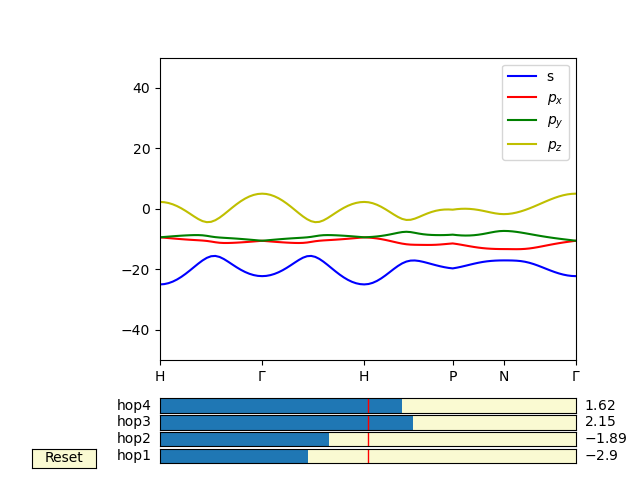

In [1]:
#This is a toy model of interactive 4 band tight binding model via PythTB

%matplotlib notebook
from pythtb import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
# lattice vectors and orbital positions
lat=[[-0.5,0.5,0.5],[0.5,-0.5,0.5],[0.5,0.5,-0.5]]
orb=[[0.0,0.0,0.0],[0.5,0.5,0.5],[0.5,0.5,0.5],[0.5,0.5,0.5]]
# three-dimensional tight-binding model
gra=tb_model(3, 3, lat, orb)
# define hopping between orbitals
t1=0
t2=0
t3=0
t4=0
# define onsite energy
gra.set_onsite([-10.0,-10.0,-10.0,-10.0])
def f(model,a,b,c,d):
    #specify the hopping

    model.set_hop(a, 0, 1, [0.0, 0.0, 0.0],mode="reset")
    model.set_hop(a, 0, 2, [0.0, 0.0, 0.0],mode="reset")
    model.set_hop(a, 0, 3, [0.0, 0.0, 0.0],mode="reset")
    
    model.set_hop(b, 0, 0, [1.0, 0.0, 0.0],mode="reset")
    model.set_hop(b, 0, 0, [0, 1.0,0.0],mode="reset")
    
    model.set_hop(b, 0, 0, [0, 0.0,1.0],mode="reset")
    
    model.set_hop(c, 1, 1, [1.0, 0.0, 0.0],mode="reset")
    model.set_hop(c, 2, 2, [0.0, 1.0, 0.0],mode="reset")
    model.set_hop(c, 3, 3, [0.0, 0.0, 1.0],mode="reset")
    
    model.set_hop(d, 1, 2, [1.0, 0.0, 0.0],mode="reset")
    model.set_hop(d, 1, 2, [0.0, 1.0, 0.0],mode="reset")
    model.set_hop(d, 1, 2, [0.0, 0.0, 1.0],mode="reset")
    model.set_hop(d, 1, 3, [1.0, 0.0, 0.0],mode="reset")
    model.set_hop(d, 1, 3, [0.0, 1.0, 0.0],mode="reset")
    model.set_hop(d, 1, 3, [0.0, 0.0, 1.0],mode="reset")
    model.set_hop(d, 2, 3, [1.0, 0.0, 0.0],mode="reset")
    model.set_hop(d, 2, 3, [0.0, 1.0, 0.0],mode="reset")
    model.set_hop(d, 2, 3, [0.0, 0.0, 1.0],mode="reset")
    
    return model   
    
# solve model on a path in k-space
gra1 = f(gra,t1,t2,t3,t4)
k = [[0.5,-0.5,0.5],[0.0,0.0,0.0], [0.5,-0.5,0.5], [0.25,0.25,0.25],[0.0,0.0,0.5],[0.0,0.0,0.0]]
(k_vec,k_dist,k_node)=gra1.k_path(k, 100)
evals=gra1.solve_all(k_vec)


# plot bandstructure
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
l1, = plt.plot(k_dist,evals[0,:],c='b',label='s')
l2, = plt.plot(k_dist,evals[1,:],c='r',label='$p_x$')
l3, = plt.plot(k_dist,evals[2,:],c='g',label='$p_y$')
l4, = plt.plot(k_dist,evals[3,:],c='y',label="$p_z$")
ax.set_xticks(k_node)
ax.set_xticklabels(["H","$\Gamma$","H","P","N","$\Gamma$"])
ax.set_xlim(k_node[0],k_node[-1])
ax.set_ylim(-50,50)
plt.legend()

#define the interactive part

axcolor = 'lightgoldenrodyellow'
axt1 = plt.axes([0.25, 0.035, 0.65, 0.03], facecolor=axcolor) 
axt2 = plt.axes([0.25, 0.07, 0.65, 0.03], facecolor=axcolor)
axt3 = plt.axes([0.25, 0.105, 0.65, 0.03], facecolor=axcolor)
axt4 = plt.axes([0.25, 0.14, 0.65, 0.03], facecolor=axcolor)

st1 = Slider(axt1, 'hop1', -10.0, 10.0, valinit=t1)
st2 = Slider(axt2, 'hop2', -10.0, 10.0, valinit=t2)
st3 = Slider(axt3, 'hop3', -10.0, 10.0, valinit=t3)
st4 = Slider(axt4, 'hop4', -10.0, 10.0, valinit=t4)


def update(val):
    t1 = st1.val  
    t2 = st2.val
    t3 = st3.val
    t4 = st4.val
    gra1 = f(gra,t1,t2,t3,t4)
    k = [[0.5,-0.5,0.5],[0.0,0.0,0.0], [0.5,-0.5,0.5], [0.25,0.25,0.25],[0.0,0.0,0.5],[0.0,0.0,0.0]]
    (k_vec,k_dist,k_node)=gra.k_path(k, 100)
    evals=gra.solve_all(k_vec)
    l1.set_ydata(evals[0,:])
    l2.set_ydata(evals[1,:])
    l3.set_ydata(evals[2,:])
    l4.set_ydata(evals[3,:])
    fig.canvas.draw_idle()

st1.on_changed(update) 
st2.on_changed(update)
st3.on_changed(update)
st4.on_changed(update)

resetax = plt.axes([0.05, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    st1.reset()
    st2.reset()
    st3.reset()
    st4.reset()

button.on_clicked(reset)

plt.show()